# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [699]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "../Resources/city_data.csv"
ride_data_to_load = "../Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [700]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12


### Merge the DataFrames

In [701]:


# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

#format the date 
pyber_data_df["date"] = pd.to_datetime(pyber_data_df["date"])
 
# Display the data table for preview
pyber_data_df.head(100)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
95,Williamsstad,2019-03-29 21:43:00,35.58,4.747780e+12,59,Urban
96,North Jason,2019-03-08 20:06:00,25.21,3.180080e+12,6,Urban
97,Christopherfurt,2019-04-17 02:25:00,23.30,7.819060e+12,41,Urban
98,Liumouth,2019-01-11 17:15:00,36.78,1.464520e+12,69,Urban


## Deliverable 1: Get a Summary DataFrame 

In [702]:


#  1. Get the total rides for each city type

Total_Rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
Total_Rides





type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [703]:
# 2. Get the total drivers for each city type

Total_Drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
Total_Drivers.head()



type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [704]:
#  3. Get the total amount of fares for each city type.


Total_Fares = pyber_data_df.groupby(["type"]).sum()["fare"]
Total_Fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [705]:
#  4. Get the average fare per ride for each city type. 


Total_fares = pyber_data_df["fare"].mean()

average_fare_per_ride =   Total_Fares / Total_Rides
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [706]:
# 5. Get the average fare per driver for each city type. 



Total_Drivers = city_data_df.groupby(["type"]).sum()["driver_count"]

average_fare_per_driver =   Total_Fares / Total_Drivers
average_fare_per_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [707]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df =['Rural','Suburban','Urban']

pyber_summary_df = pd.Series(pyber_summary_df)
pyber_summary_df

pyber_summary_df = pd.DataFrame(
{"Total Rides": Total_Rides,
    "Total Drivers": Total_Drivers,
    "Total Fares": Total_Fares,
    "Average Fare per Ride": average_fare_per_ride,
    "Average Fare per Driver": average_fare_per_driver})
pyber_summary_df



,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [708]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [709]:
#  8. Format the columns.

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df


pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

pyber_summary_df.head()



,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [710]:
# 1. Read the merged DataFrame


#total_weekly_fares_new_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])




In [719]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

total_weekly_fares_new_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
total_weekly_fares_new_df.head()




type   date               
Rural  2019-01-01 09:45:00    43.69
       2019-01-02 11:18:00    52.12
       2019-01-03 19:51:00    19.90
       2019-01-04 03:31:00    24.88
       2019-01-06 07:38:00    47.33
Name: fare, dtype: float64

In [720]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.


total_weekly_fares_new_df = total_weekly_fares_new_df.reset_index()
total_weekly_fares_new_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33


In [721]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

total_weekly_fares_new_df = total_weekly_fares_new_df.pivot(index="date", columns="type", values="fare")
total_weekly_fares_new_df.head()







type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75


In [722]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

new_date_df = total_weekly_fares_new_df.loc['2019-01-01':'2019-04-28']
new_date_df.head()



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75


In [723]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.



new_date_df.index = pd.to_datetime(new_date_df.index)
new_date_df.head()










type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75


In [716]:
# 7. Check that the datatype for the index is datetime using df.info()


new_date_df.info()










<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 19:35:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [717]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.


resampled_new_date_df = new_date_df.resample("W").sum()
resampled_new_date_df.head(100)











type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


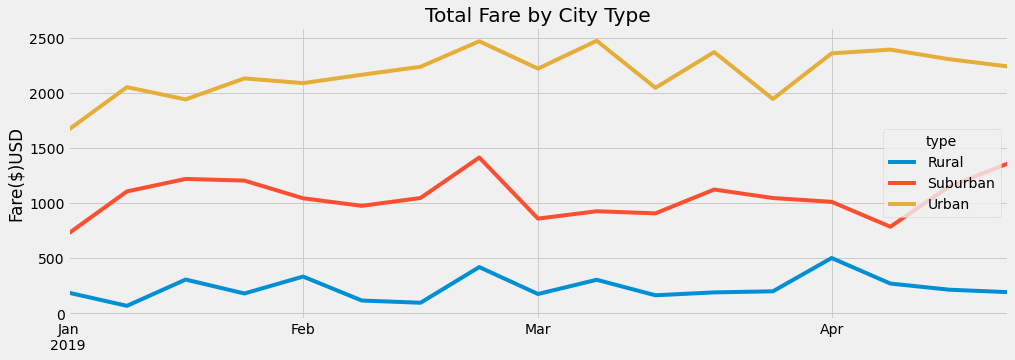

In [718]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


ax = resampled_new_date_df.plot(figsize=(15,5))


ax.set_title("Total Fare by City Type")

ax.set_xlabel("")
ax.set_ylabel("Fare($)USD")





plt.savefig("C:/Users/rhutc/OneDrive/Desktop/DU_Class_Folder/PyBer_Analysis/Analysis/Pyber_fare_summary.png")



